# Introducción a la series de tiempo

El siguiente cuaderno tiene como objetivo introducir al lector al manejo básico de las series de tiempo en python.

Las librerías necesarias son:
  * pandas
  * matplotlib



In [213]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt

In [214]:
url = r"C:\Users\Angel Resendiz Plata\OneDrive\Documentos\Programación\4Geeks\Guía programa\23.- Time Series Forecasting\Ejercicios\Datos\acea-water-prediction\Aquifer_Petrignano.csv"

In [215]:
df = pd.read_csv(url)

In [216]:
df2 = df.copy()
df2

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [217]:
# Contar NaN por columna
print("\n--- Conteo de NaN ---")
print(df2.isnull().sum())

# Contar 0 por columna
print("\n--- Conteo de 0 ---")
print(df.eq(0).sum())


--- Conteo de NaN ---
Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

--- Conteo de 0 ---
Date                                       0
Rainfall_Bastia_Umbra                   3147
Depth_to_Groundwater_P24                   0
Depth_to_Groundwater_P25                   0
Temperature_Bastia_Umbra                   7
Temperature_Petrignano                   153
Volume_C10_Petrignano                     30
Hydrometry_Fiume_Chiascio_Petrignano     150
dtype: int64


In [218]:
columnas_a_eliminar = ["Rainfall_Bastia_Umbra", 
                       "Temperature_Bastia_Umbra", 
                       "Temperature_Petrignano",
                       "Volume_C10_Petrignano",
                       "Hydrometry_Fiume_Chiascio_Petrignano"]
df2 = df.drop(columns=columnas_a_eliminar, axis=1)

In [235]:
# Contar NaN por columna
print("\n--- Conteo de NaN ---")
print(df2.isnull().sum())

# Contar 0 por columna
print("\n--- Conteo de 0 ---")
print(df2.eq(0).sum())


--- Conteo de NaN ---
Date                        0
Depth_to_Groundwater_P24    0
Depth_to_Groundwater_P25    0
dtype: int64

--- Conteo de 0 ---
Date                        0
Depth_to_Groundwater_P24    0
Depth_to_Groundwater_P25    0
dtype: int64


In [236]:
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25
0,14/03/2006,-22.48,-22.18
1,15/03/2006,-22.38,-22.14
2,16/03/2006,-22.25,-22.04
3,17/03/2006,-22.38,-22.04
4,18/03/2006,-22.60,-22.04
...,...,...,...
5218,26/06/2020,-25.68,-25.07
5219,27/06/2020,-25.80,-25.11
5220,28/06/2020,-25.80,-25.19
5221,29/06/2020,-25.78,-25.18


In [233]:
df2.dtypes

Date                         object
Depth_to_Groundwater_P24    float64
Depth_to_Groundwater_P25    float64
dtype: object

# visualizar

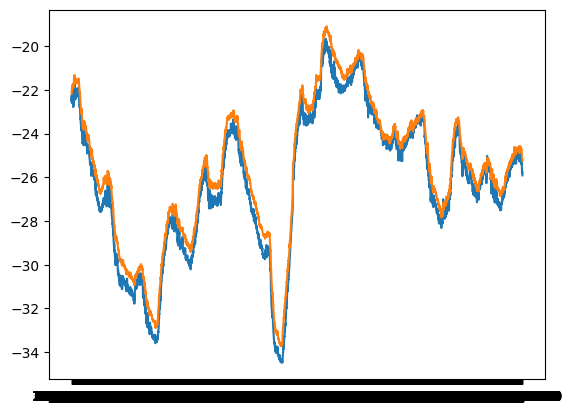

In [234]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])

Graficar

Text(0.5, 0, 'time')

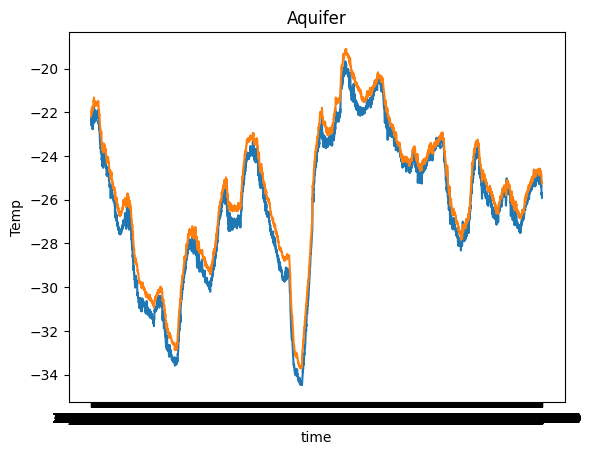

In [237]:
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Date'], df2['Depth_to_Groundwater_P25'])
plt.title("Aquifer")
plt.ylabel("Temp")
plt.xlabel("time")

In [238]:
df2['time'] = pd.to_datetime(df2['Date'])


C:\Users\Angel Resendiz Plata\AppData\Local\Temp\ipykernel_19664\3431971326.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['time'] = pd.to_datetime(df2['Date'])


In [239]:
df2

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time
0,14/03/2006,-22.48,-22.18,2006-03-14
1,15/03/2006,-22.38,-22.14,2006-03-15
2,16/03/2006,-22.25,-22.04,2006-03-16
3,17/03/2006,-22.38,-22.04,2006-03-17
4,18/03/2006,-22.60,-22.04,2006-03-18
...,...,...,...,...
5218,26/06/2020,-25.68,-25.07,2020-06-26
5219,27/06/2020,-25.80,-25.11,2020-06-27
5220,28/06/2020,-25.80,-25.19,2020-06-28
5221,29/06/2020,-25.78,-25.18,2020-06-29


In [240]:
df2.dtypes

Date                                object
Depth_to_Groundwater_P24           float64
Depth_to_Groundwater_P25           float64
time                        datetime64[ns]
dtype: object

Pasar de string to datetime nos permite realizar operaciones sobre las fechas, como extarér el día, sumar etc..


In [241]:
print(df2['time'].min())
print(df2['time'].max()) # fecha más reciente en la base

2006-03-14 00:00:00
2020-06-30 00:00:00


In [242]:
df2['time'].max() - df2['time'].min() #timestamp, #timedelta

Timedelta('5222 days 00:00:00')

In [243]:
# Extaer información relevante para analizar, por ejempo los días, los meses, etc..
df2['day'] = df2['time'].dt.day

In [244]:
df2.tail()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day
5218,26/06/2020,-25.68,-25.07,2020-06-26,26
5219,27/06/2020,-25.80,-25.11,2020-06-27,27
5220,28/06/2020,-25.80,-25.19,2020-06-28,28
5221,29/06/2020,-25.78,-25.18,2020-06-29,29
5222,30/06/2020,-25.91,-25.25,2020-06-30,30


In [245]:
df2['day_name'] = df2['time'].dt.day_name()
# prueba con month, year

In [ ]:
df2['day_name']

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
5218       Friday
5219     Saturday
5220       Sunday
5221       Monday
5222      Tuesday
Name: day_name, Length: 5223, dtype: object

In [246]:
# analizar las transacciones en un día particiular puede ser importante...
# podriamos realziar un ejercicio de comparación usando ANOVA?
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
0,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday
1,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday
2,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday
3,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday
4,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday


In [247]:
# promedio de cierre por día
df2.groupby([df2["time"].dt.day_name()])['Depth_to_Groundwater_P25'].mean()

time
Friday      -25.706653
Monday      -25.667106
Saturday    -25.705894
Sunday      -25.678449
Thursday    -25.691316
Tuesday     -25.683324
Wednesday   -25.692704
Name: Depth_to_Groundwater_P25, dtype: float64

In [248]:
# precio de cierre por mes y día de la semana
df2.groupby([df2["time"].dt.month, df2["time"].dt.day_name()])['Depth_to_Groundwater_P25'].mean()
# interesante observe el septimo mes en cada día

time  time     
1     Friday      -26.128710
      Monday      -26.185410
      Saturday    -26.204590
      Sunday      -26.182787
      Thursday    -26.258889
                     ...    
12    Saturday    -26.660476
      Sunday      -26.612540
      Thursday    -26.446271
      Tuesday     -26.476129
      Wednesday   -26.488333
Name: Depth_to_Groundwater_P25, Length: 84, dtype: float64

In [249]:
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
0,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday
1,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday
2,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday
3,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday
4,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday


Text(0, 0.5, 'mean price')

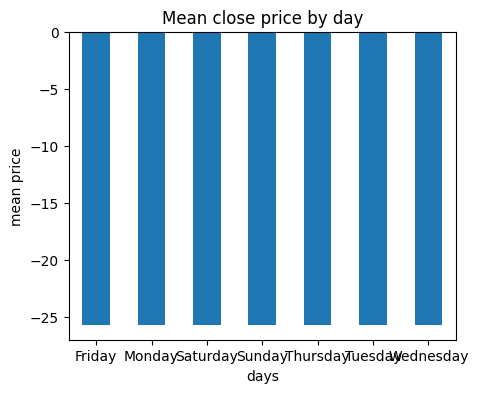

In [250]:
# gráficando el día
fig, axs = plt.subplots(figsize=(5,4))
df2.groupby(df2["time"].dt.day_name())["Depth_to_Groundwater_P25"].mean().plot(
    kind='bar', rot=0, ax=axs)
plt.title("Mean close price by day")
plt.xlabel("days")
plt.ylabel("mean price")

In [252]:
# datetime como index
df2.set_index(df2['time'], inplace=True) #Una ventaja  el ajuste de las fechas

In [253]:
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
time,,,,,,
2006-03-14,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday
2006-03-15,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday
2006-03-16,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday
2006-03-17,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday
2006-03-18,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday


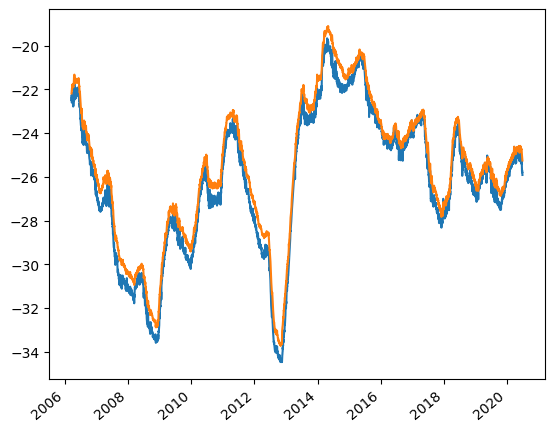

In [254]:
plt.plot(df2['Depth_to_Groundwater_P24'])
plt.plot(df2['Depth_to_Groundwater_P25'])
plt.xticks(rotation=40, ha='right'); #not show text

In [255]:
# determinando el índice podemos usar el slicing...
df2['2006-05-18':'2006-06-18']
df2.tail()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name
time,,,,,,
2020-06-26,26/06/2020,-25.68,-25.07,2020-06-26,26,Friday
2020-06-27,27/06/2020,-25.80,-25.11,2020-06-27,27,Saturday
2020-06-28,28/06/2020,-25.80,-25.19,2020-06-28,28,Sunday
2020-06-29,29/06/2020,-25.78,-25.18,2020-06-29,29,Monday
2020-06-30,30/06/2020,-25.91,-25.25,2020-06-30,30,Tuesday


<Axes: xlabel='time'>

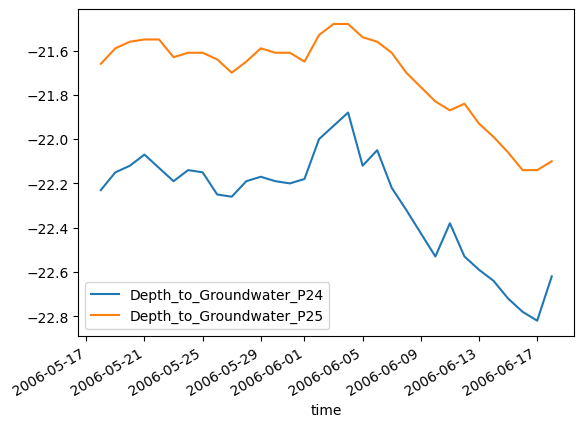

In [256]:
df2['2006-05-18':'2006-06-18'][['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].plot()

In [257]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


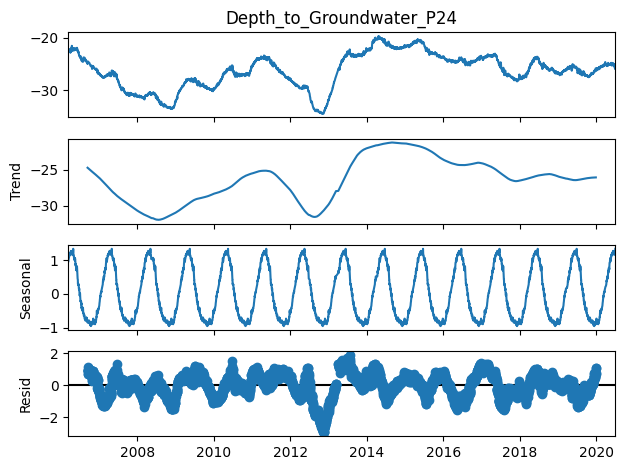

In [258]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df2['Depth_to_Groundwater_P24'].dropna(), model='additive', period=365)
decomposition.plot()
plt.show()

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

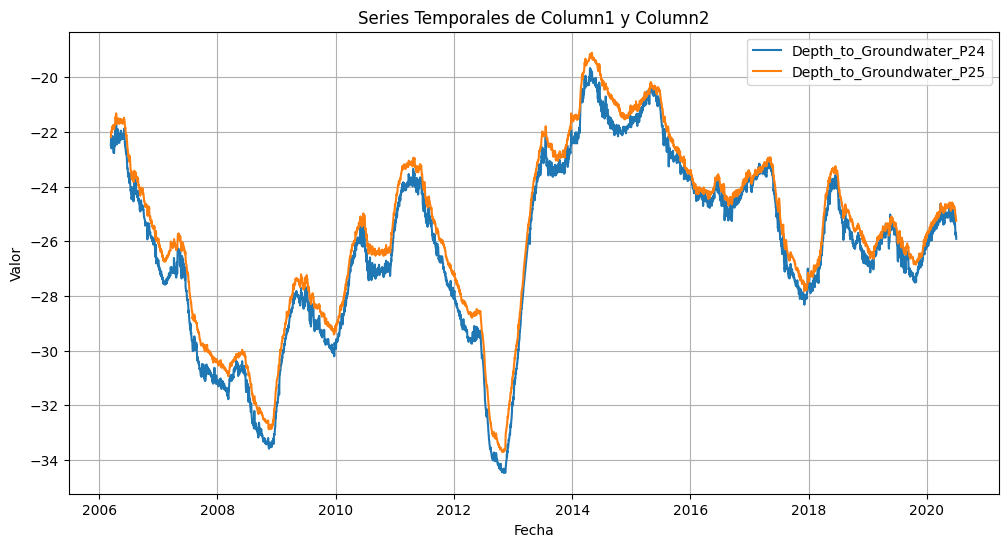

In [260]:
# Graficar Column1 y Column2 en función de Date
plt.figure(figsize=(12,6))
plt.plot(df2['time'], df2['Depth_to_Groundwater_P24'], label='Depth_to_Groundwater_P24')
plt.plot(df2['time'], df2['Depth_to_Groundwater_P25'], label='Depth_to_Groundwater_P25')
plt.title("Series Temporales de Column1 y Column2")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

In [265]:
# Crear la serie lagged
lagged = np.zeros(len(df2))  # inicializamos con ceros
init = 9.4

In [269]:
lagged

array([   8.80847365,    2.83382601,    1.79020056, ..., -330.24556119,
       -331.27330717, -329.1653268 ], shape=(5157,))

In [266]:
for i in range(len(df2)):
    lagged[i] = init + np.random.normal(0, 3)
    init = lagged[i]

# Agregamos la serie al DataFrame
df2['Lagged'] = lagged

In [270]:
lagged

array([   8.80847365,    2.83382601,    1.79020056, ..., -330.24556119,
       -331.27330717, -329.1653268 ], shape=(5157,))

In [267]:
# ---- Nueva parte: añadir tendencia ----
t_index = np.arange(len(df2))  # índice numérico de 0 a 99
df2['Depth_to_Groundwater_P24_trend'] = df2['Depth_to_Groundwater_P24'] + (0.3 * t_index)

In [271]:
t_index

array([   0,    1,    2, ..., 5154, 5155, 5156], shape=(5157,))

In [272]:
n = len(df2)
y1 = np.random.normal(0, 5, n//2)
y2 = np.random.normal(0, 30, n - n//2)  # el resto para empatar la longitud
yhet = np.append(y1, y2)

df2['Hetero'] = yhet

In [278]:
# Serie estacional (nueva)
df2['Seasonal'] = 7 + np.cos(t_index * 0.17) * 1.3

In [287]:
# Extraer componentes
ytrend = decomposition.trend
ysea = decomposition.seasonal
yhet = decomposition.resid   # residuo = ruido no explicado
y = df2['Depth_to_Groundwater_P24'].mean()    # nivel promedio

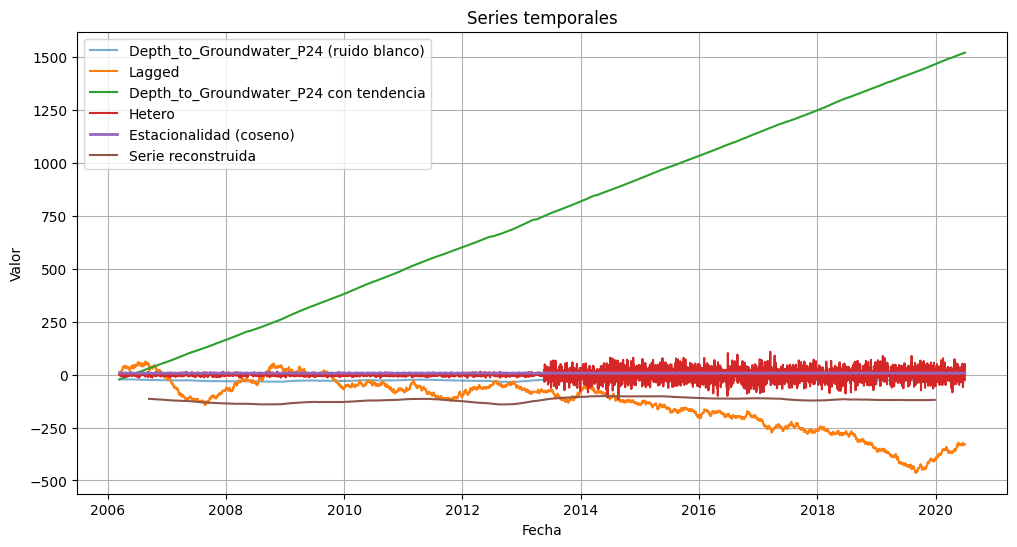

In [289]:
# Graficar Column1 y Column1 con tendencia
plt.figure(figsize=(12,6))
plt.plot(df2['time'], df2['Depth_to_Groundwater_P24'], label='Depth_to_Groundwater_P24 (ruido blanco)', alpha=0.6)
plt.plot(df2['time'], df2['Lagged'], label='Lagged')
plt.plot(df2['time'], df2['Depth_to_Groundwater_P24_trend'], label='Depth_to_Groundwater_P24 con tendencia')
plt.plot(df2['time'], df2['Hetero'], label='Hetero')
plt.plot(df2['time'], df2['Seasonal'], label='Estacionalidad (coseno)', linewidth=2)
plt.plot(df2.index, ysea + ytrend*3.56 + y + yhet, label="Serie reconstruida")
plt.title("Series temporales")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()

In [281]:
from statsmodels.graphics.tsaplots import plot_acf

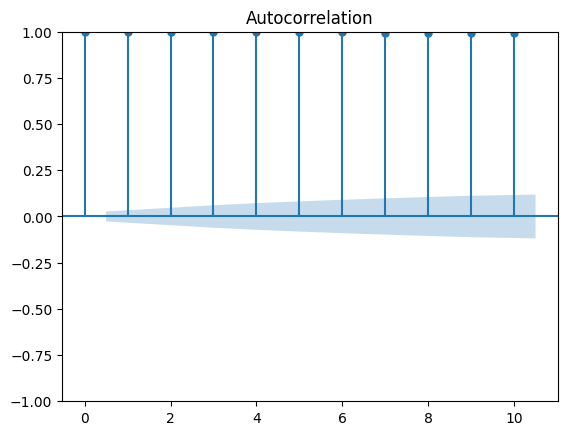

In [282]:
plot_acf(lagged, lags=10);

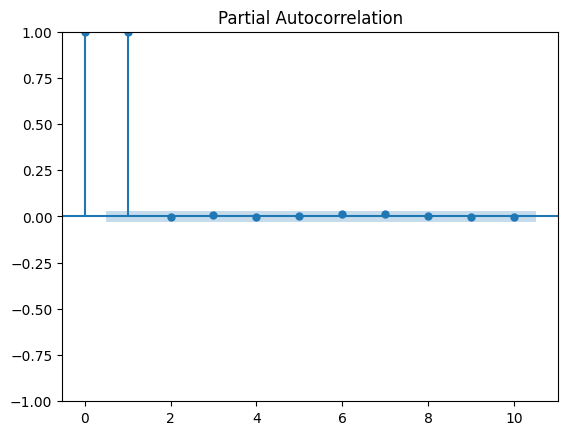

In [283]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lagged, lags=10);  # Plot for the first 20 lags

In [298]:
# Serie original
y = df2['Depth_to_Groundwater_P24'].values

# Dividir en 10 bloques y calcular estadísticas
splits = np.array_split(y, 10)   # uso array_split porque maneja mejor si no se divide exacto
print("Análisis de la serie original (Depth_to_Groundwater_P24):")
for i, block in enumerate(splits, 1):
    print(f"Bloque {i}: media={np.mean(block):.2f}, std={np.std(block):.2f}")

print("--"*20)

# Serie de tendencia obtenida en la descomposición
ytrend = decomposition.trend.dropna().values  # quitar NaN en los extremos
splits_trend = np.array_split(ytrend, 10)

print("Análisis de la tendencia (Feature1):")
for i, block in enumerate(splits_trend, 1):
    print(f"Bloque {i}: media={np.mean(block):.2f}, std={np.std(block):.2f}")

Análisis de la serie original (Depth_to_Groundwater_P24):
Bloque 1: media=-25.60, std=2.16
Bloque 2: media=-31.61, std=1.03
Bloque 3: media=-28.48, std=1.23
Bloque 4: media=-25.69, std=1.32
Bloque 5: media=-30.26, std=2.80
Bloque 6: media=-22.05, std=1.18
Bloque 7: media=-22.33, std=1.25
Bloque 8: media=-24.38, std=0.88
Bloque 9: media=-26.29, std=1.27
Bloque 10: media=-26.04, std=0.73
----------------------------------------
Análisis de la tendencia (Feature1):
Bloque 1: media=-27.93, std=1.82
Bloque 2: media=-31.16, std=0.65
Bloque 3: media=-28.20, std=0.83
Bloque 4: media=-25.85, std=0.72
Bloque 5: media=-29.84, std=1.40
Bloque 6: media=-22.55, std=1.44
Bloque 7: media=-22.03, std=0.74
Bloque 8: media=-24.24, std=0.22
Bloque 9: media=-26.03, std=0.43
Bloque 10: media=-26.10, std=0.27


In [309]:
[np.mean(block) for block in splits]

[np.float64(-25.601492248062016),
 np.float64(-31.60943798449612),
 np.float64(-28.479767441860464),
 np.float64(-25.692538759689924),
 np.float64(-30.256085271317833),
 np.float64(-22.05133720930233),
 np.float64(-22.333372093023257),
 np.float64(-24.37978640776699),
 np.float64(-26.288796116504855),
 np.float64(-26.035533980582525)]

In [300]:
mean_blocks = np.array([np.mean(block) for block in splits])
print(mean_blocks)

[-25.60149225 -31.60943798 -28.47976744 -25.69253876 -30.25608527
 -22.05133721 -22.33337209 -24.37978641 -26.28879612 -26.03553398]


In [301]:
splits_trend = np.array_split(ytrend, 10)
mean_trend_blocks = np.array([np.mean(block) for block in splits_trend])
print(mean_trend_blocks)

[-27.92933447 -31.16006998 -28.19896541 -25.84992416 -29.84090611
 -22.54663792 -22.03213012 -24.23853285 -26.03103252 -26.09834152]


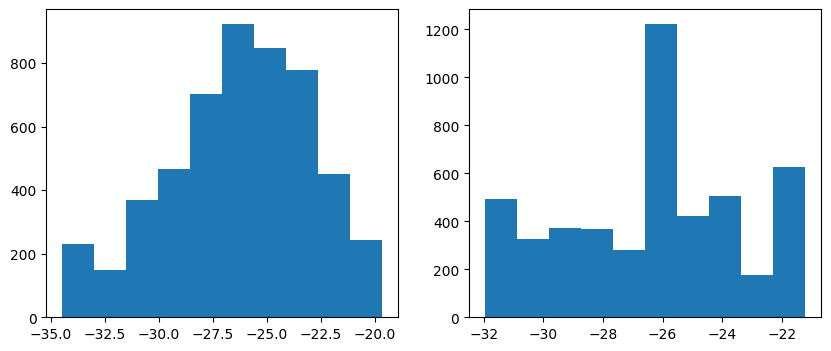

In [302]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns
axes[0].hist(y) # White noise
axes[1].hist(ytrend) # trend - uniform!
plt.show()

You can safely remove it manually.
You can safely remove it manually.


In [320]:
!pip install numpy==1.26.4 --quiet

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + C:\Program Files\Python313\python.exe C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-b6xi2lj4\numpy_32f31e4cdaaa4bcea8db3f65e3fc15e5\vendored-meson\meson\meson.py setup C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-b6xi2lj4\numpy_32f31e4cdaaa4bcea8db3f65e3fc15e5 C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-b6xi2lj4\numpy_32f31e4cdaaa4bcea8db3f65e3fc15e5\.mesonpy-379sbyjv -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-b6xi2lj4\numpy_32f31e4cdaaa4bcea8db3f65e3fc15e5\.mesonpy-379sbyjv\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-b6xi2lj4\numpy_32f31e4cdaaa4bcea8db3f65e3fc15e5
      Build dir: C:

In [321]:
!pip install pmdarima --no-cache-dir --quiet

  error: subprocess-exited-with-error
  
  × Building wheel for pmdarima (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [43 lines of output]
      Partial import of pmdarima during the build process.
      
      Requirements: ['joblib>=0.11\nCython>=0.29,!=0.29.18,!=0.29.31\nnumpy>=1.21.2\npandas>=0.19\nscikit-learn>=0.22\nscipy>=1.3.2\nstatsmodels>=0.13.2\nurllib3\nsetuptools>=38.6.0,!=50.0.0\npackaging>=17.1  # Bundled with setuptools, but want to be explicit\n']
      Adding extra setuptools args
      Setting up with setuptools
      Traceback (most recent call last):
        File "C:\Users\Angel Resendiz Plata\AppData\Roaming\Python\Python313\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "C:\Users\Angel Resendiz Plata\AppData\Roaming\Python\Python313\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"

In [322]:
!pip uninstall -y numpy pmdarima --quiet

In [324]:
df2.head()

,Date,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,time,day,day_name,Lagged,Depth_to_Groundwater_P24_trend,Hetero,Seasonal
time,,,,,,,,,,
2006-03-14,14/03/2006,-22.48,-22.18,2006-03-14,14,Tuesday,8.808474,-22.48,-0.977416,8.300000
2006-03-15,15/03/2006,-22.38,-22.14,2006-03-15,15,Wednesday,2.833826,-22.08,8.182038,8.281260
2006-03-16,16/03/2006,-22.25,-22.04,2006-03-16,16,Thursday,1.790201,-21.65,-2.562933,8.225581
2006-03-17,17/03/2006,-22.38,-22.04,2006-03-17,17,Friday,6.354947,-21.48,10.257580,8.134568
2006-03-18,18/03/2006,-22.60,-22.04,2006-03-18,18,Saturday,7.634680,-21.40,5.378426,8.010845


In [334]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [335]:
pip install numpy scipy Cython

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached cython-3.1.3-cp313-cp313-win_amd64.whl.metadata (4.9 kB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
Using cached cython-3.1.3-cp313-cp313-win_amd64.whl (2.7 MB)

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   --------------------------------------

In [344]:
pip install pmdarima numpy==1.26.4 --force-reinstall

Defaulting to user installation because normal site-packages is not writeable
  Using cached pmdarima-2.0.4.tar.gz (630 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + c:\Program Files\Python313\python.exe C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-l5a7ntj1\numpy_5099538076b244178a4928262182b03c\vendored-meson\meson\meson.py setup C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-l5a7ntj1\numpy_5099538076b244178a4928262182b03c C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-l5a7ntj1\numpy_5099538076b244178a4928262182b03c\.mesonpy-xy68p48l -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-l5a7ntj1\numpy_5099538076b244178a4928262182b03c\.mesonpy-xy68p48l\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\Angel Resendiz Plata\AppData\Local\Temp\pip-install-l5a7ntj1\numpy_5099538076b244178a4928262182b03c
      Build dir: C:

In [346]:
import pandas as pd

In [347]:
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [348]:
import matplotlib.pyplot as plt

In [343]:
modelo = auto_arima(df2['sales'], seasonal=False,
                    stepwise=True,
                    trace=True)
print(modelo.summary())

NameError: name 'auto_arima' is not defined